# Julia does interactive numerics like Matlab

Interactive numerical and graphical computation, plus
  * familiar syntax, improved
  * rich numeric types: rational numbers, arbitrary-precision numbers
  * metaprogramming: transforming then evaluating chunks of code
  * Unicode variables and source text: $\alpha \; \beta \; \gamma \; \aleph \; x_j \; A_{ij} \; \oplus \; \ldots$
  * notebook interface with embedded graphics and LaTeX: $\text{erf}(x) = \pi^{-1/2} \int_{-x}^x e^{-t^2} dt$
  
  
## Solving Ax=b with backslash operator

In [1]:
# random matrix with normally distributed elements
A = randn(4,4)

4×4 Array{Float64,2}:
 -1.06133    0.455741  -0.100564  1.05912 
  0.821417   1.28116    1.00801   0.546433
  0.781779   0.89757    1.13523   0.185553
  0.187522  -1.87101   -1.06749   0.287633

In [2]:
# familiar colon syntax: get 1st col of A
a₁ = A[:,1]

4-element Array{Float64,1}:
 -1.06133 
  0.821417
  0.781779
  0.187522

In [3]:
# set up Ax=b problem with known solution x
x = randn(4)
b = A*x

4-element Array{Float64,1}:
 -0.0351173
 -0.60573  
 -0.535406 
 -1.23662  

In [4]:
# compute numerical solution x̂ of Ax=b using backslash operator
x̂ = A\b

4-element Array{Float64,1}:
 -0.628959
  0.68117 
 -0.414284
 -0.995873

In [5]:
# compute error
@show norm(A*x̂ - b)    # @show macro: print expression = <value of expression>

norm(A * x̂ - b) = 3.3306690738754696e-16


3.3306690738754696e-16

In [6]:
# what is machine precision for Float64 type?
eps(Float64)

2.220446049250313e-16

In [7]:
# compute condition number of A
cond(A)

13.716464366214403

## SVD and eigenvalues

In [8]:
U, σ, V = svd(A);
@show σ;

σ = [3.12138, 1.64675, 1.0432, 0.227565]


In [9]:
m = 32
λ = eigvals(randn(m,m)/sqrt(m))

32-element Array{Complex{Float64},1}:
   -1.14239+0.118269im
   -1.14239-0.118269im
  -0.873745+0.485744im
  -0.873745-0.485744im
    0.95936+0.0im     
    0.92448+0.212287im
    0.92448-0.212287im
   0.673986+0.533083im
   0.673986-0.533083im
   0.338716+0.786636im
   0.338716-0.786636im
  -0.438346+0.756205im
  -0.438346-0.756205im
           ⋮          
   0.259182-0.414416im
   0.434993+0.0im     
   -0.09899+0.528763im
   -0.09899-0.528763im
  -0.560704+0.0im     
  -0.331725+0.363972im
  -0.331725-0.363972im
  -0.285784+0.107731im
  -0.285784-0.107731im
 -0.0416672+0.180437im
 -0.0416672-0.180437im
 0.00503397+0.0im     

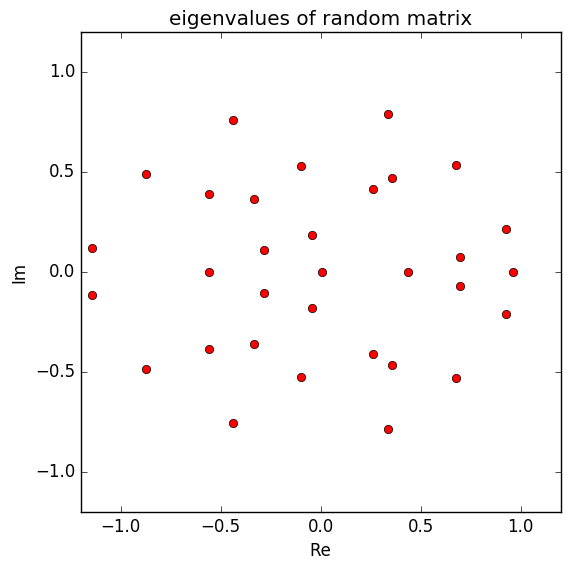

In [10]:
using PyPlot
plot(real(λ), imag(λ), "ro")
xlabel("Re")
ylabel("Im")
axis("square")
title("eigenvalues of random matrix")
xlim(-1.2,1.2)
ylim(-1.2,1.2);

## Integrate Lorenz equations

In [11]:
using ODE
using PyPlot

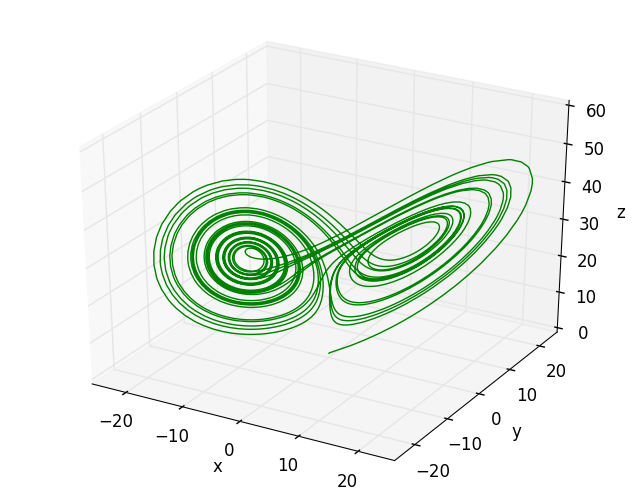

In [15]:
# define Lorenz equations ẋ = f(t,x)
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]); x[1]*x[2] - β*x[3]]
end

# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:30.0
x₀ = [0.1; 0.0; 0.0]
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Function definition

In [16]:
fib(n) = n < 2 ? 1 : fib(n-1) + fib(n-2)  # recursive fibonacci function

for n = 0:10
    println("fib($n) = $(fib(n))")        # string interpolation
end

fib(0) = 1
fib(1) = 1
fib(2) = 2
fib(3) = 3
fib(4) = 5
fib(5) = 8
fib(6) = 13
fib(7) = 21
fib(8) = 34
fib(9) = 55
fib(10) = 89


## Free, open, and internet-enabled

May the source be with you

In [18]:
@which A\b

\(A::AbstractArray{T,2} where T, B::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T) in Base.LinAlg at linalg/generic.jl:805

In [19]:
@which ode45(f, x₀, t)

ODE.ode45(fn, y0, tspan) in ODE at /home/gibson/.julia/v0.6/ODE/src/runge_kutta.jl:219

In [20]:
@which cond(A)

cond(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:911